# Task 1 $-$ to import and check visualization of 'fashion-mnist' dataset

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = '/home/al_cher/Documents/fashion-mnist/data/fashion/' #your way to work_dir
def open_fashion_mnist(data_path = data_path):
    
    #retrieving dims
    fd = open(os.path.join(data_path, f'train-images-idx3-ubyte'), 'rb')
    load_dims_train = np.fromfile(file = fd, dtype = np.uint32).byteswap(inplace = True)
    tlength, trows, tcolumns = load_dims_train[1], load_dims_train[2].astype(np.uint8), load_dims_train[3].astype(np.uint8)
    fd = open(os.path.join(data_path, f't10k-images-idx3-ubyte'), 'rb')
    load_dims_test = np.fromfile(file = fd, dtype = np.uint32).byteswap(inplace = True)
    slength, srows, scolumns = load_dims_test[1], load_dims_test[2].astype(np.uint8), load_dims_test[3].astype(np.uint8)

    fd = open(os.path.join(data_path, f'train-images-idx3-ubyte'), 'rb')
    loaded = np.fromfile(file = fd, dtype = np.uint8).byteswap(inplace = True)
    X_train = loaded[16:].reshape((tlength, trows, tcolumns)).astype(float)
    
    fd = open(os.path.join(data_path, f't10k-images-idx3-ubyte'), 'rb')
    loaded = np.fromfile(file = fd, dtype = np.uint8).byteswap(inplace = True)
    X_test = loaded[16:].reshape((slength, srows, scolumns)).astype(float)
       
    fd = open(os.path.join(data_path, f'train-labels-idx1-ubyte'), 'rb')
    loaded = np.fromfile(file = fd, dtype = np.uint8).byteswap(inplace = True)
    Y_train = np.asarray(loaded[8:].reshape((tlength)))
    
    fd = open(os.path.join(data_path, f't10k-labels-idx1-ubyte'), 'rb')
    loaded = np.fromfile(file = fd, dtype = np.uint8).byteswap(inplace = True)
    Y_test = np.asarray(loaded[8:].reshape((slength)))
    
    return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = open_fashion_mnist()

In [ ]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(Y_train))
print('Train classes distribution: %s' % np.bincount(Y_train[:]))
print('Test classes distribution: %s' % np.bincount(Y_test))

In [ ]:
label_dict = {
 0: "T-shirt'/'top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

def imshow(X, Y):
    for idx, im in enumerate(X):
        print(label_dict[Y[idx - 1]])
        plt.imshow(im)
        plt.show()
_ = imshow(X_test, Y_test)

# Task 2 − SVD decomposition starters


## Definition and intuitive interpretation


**Singular Value Decomposition (SVD)** of matrix $A$ is the factorization of $A$ into  the product of three matrices $A = UDV^T$ where the columns of $U$ and $V$ are orthonormal and the matrix $D$ is diagonal with positive real entries. 

Let $A$ be an $n \times d$ matrix with singular vectors $\mathbf{v_1}, ... , \mathbf{v_r}$ and corresponding values $\sigma_1, ..., \sigma_r$: 
                    \begin{equation*} 
                       \mathbf{v_j} = argmax_{\mathbf{v_j} \perp \mathbf{v_1}, ..., \mathbf{v_{j-1}}}|A\mathbf{v}|
                       \\ \sigma_j = |A\mathbf{v_j}|
                    \end{equation*}
Then $\mathbf{u_j}$ are left-singular vectors, according to linear algebra, $\mathbf{u_j} = \frac{1}{\sigma_j}A\mathbf{v_j}$ Thus, 
                    \begin{equation*} 
                      A = \sum_{i}^{r} \sigma_i \mathbf{u_i} \mathbf{v_i^T}
                    \end{equation*}
    *About dims*: $A_{n \times d} = U_{n \times r} D_{r \times r} V_{r \times d}^T $
                    
**Geometrical meaning**


Let a linear operator be associated with the matrix $A$. The singular decomposition can be reformulated in geometric terms. A linear operator that displays the elements of space in the form $\mathfrak{R}^n$ of executable linear operators of rotation, extension, and rotation. Thus, singular changes in the display of geometric changes when displaying a linear operator are all in different spaces.

<img src = "svd_depict.png">

In the special case when $M$ is an $m \times m$ real square matrix, the matrices $U$ and $V^*$ can be chosen to be real $m \times m$ matrices too.
    $M^* Mv = \sigma u$, $MM^* u = \sigma v$

In that case, "unitary" is the same as "orthonormal". Then, interpreting each such matrix A as the linear transformation $x \rightarrow Ax$ of the space $R^m$, the matrices $U$ and $V^*$ represent rotations or reflection of the space, while $D$ represent the scaling of each coordinate $x_i$ by the factor $σ_i$. Thus the SVD decomposition breaks down any invertible linear transformation of $R^m$ into a composition of three geometrical transformations: a rotation or reflection ($V^*$), followed by a coordinate-by-coordinate scaling ($D$), followed by another rotation or reflection ($U$).

In particular, if $M$ has a positive determinant, then $U$ and $V^*$ can be chosen to be both reflections, or both rotations. If the determinant is negative, exactly one of them will have to be a reflection. If the determinant is zero, each can be chosen to be of each type, independently.

If the matrix $M$ is real but not square, namely $m \times n$ with $m ≠ n$, it can be interepreted as a linear transformation from $R^n$ to $R^m$. Then $U$ and $V^*$ can be chosen to be rotations of $^Rm$ and $R^n$, respectively; and $D$, besides scaling the first *min{m, n}* coordinates, also extends the vector with zeros, or removes trailing coordinates, so as to turn $R^n$ into $R^m$.


[More in Russian](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5) \\
[More in English](https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf)

## Application

https://www.kaggle.com/c/word2vec-nlp-tutorial/data $-$ here i copied the task to show how SVD helps in dimension reduction

*The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.*

**File descriptions**: 

-- *labeledTrainData* $-$ The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.  

-- *testData* $-$ The test set. The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review. Your task is to predict the sentiment for each one. 

-- *unlabeledTrainData* $-$ An extra training set with no labels. The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review. 

**Data fields**: 

-- *id* $-$ Unique ID of each review

-- *sentiment* $-$ Sentiment of the review; 1 for positive reviews and 0 for negative reviews

-- *review* $-$ Text of the review


In [49]:
#importing data
import pandas as pd
imdb = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
print("Dataset shape is ", imdb.shape)
imdb.head()

Dataset shape is  (25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [50]:
#let's show that dataset has well-balanced sentiments' classes distribution
imdb.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [51]:
#making train and test split and vectoring input
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


x_train, x_test, y_train, y_test = train_test_split(imdb.review.values, imdb.sentiment.values)
vect = TfidfVectorizer(sublinear_tf = True, use_idf = True)
X_train = vect.fit_transform(x_train)
X_test = vect.transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(C = 0.15, penalty = 'l1')
clf.fit(X_train, y_train)
print ("Accuracy: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("ROC-AUC: ", metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Accuracy:  0.81408
ROC-AUC:  0.8995751463752784


In [53]:
#let's look at dimension of X_test, e.g
print("Object dim of X_test is ", X_test.shape[0])
print("Feature dim of X_test is ", X_test.shape[1])
#so we can see that dimension of feature space is extremely higher than object space!
# => to increase accuracy (now it's potentially low)

Object dim of X_test is  6250
Feature dim of X_test is  66788


In machine learning classification problems, there are often too many factors on the basis of which the final classification is done. These factors are basically variables called features. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

*Truncated SVD*: This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

In [54]:
#implementing PCA using trucnated SVD 
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 100)
X_train_pca = tsvd.fit_transform(X_train)
X_test_pca = tsvd.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_pca, y_train)
print ("Accuracy: ", metrics.accuracy_score(y_test, clf.predict(X_test_pca)))
print ("ROC-AUC: ", metrics.roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1]))

Accuracy:  0.86032
ROC-AUC:  0.9381474399468904


The features that the principal component method provides are optimal for linear methods, so logistic regression shows better results than complex non-linear classifiers.

# Task 3 $-$ Misses, NaNs in Data

Inspired by [Zen.AI](https://www.zest.ai/blog/6-methods-for-dealing-with-missing-data) blog

1)**Encode NAs as -1 or -9999**. This works reasonably well for numerical features that are predominantly positive  in value, and for tree-based models in general. This used to be a more common method in the past when the out-of-the box machine learning libraries and algorithms were not very adept at working with missing data.
    
2)**Casewise deletion of missing data**. Here you simply drop all cases or rows from the dataset that contain missing values. In the case of a very large dataset with very few missing values, this approach could potentially work really well. However, if the missing values are in cases that are also otherwise statistically distinct, this method may seriously skew the predictive model for which this data is used. Another major problem with this approach is that it will be unable to process any future data that contains missing values. If your predictive model is designed for production, this could create serious issues in deployment.
    
3)**Replace missing values with the mean/median value of the feature in which they occur**. This works for numerical features. The choice of median/mean is often related to the form of distribution that the data has. For imbalanced data, the median may be more appropriate, while for symmetrical and more normally distributed data, the mean could be a better choice.
    
4)**Label encode NAs as another level of a categorical variable**. This works with tree-based models and other models if the feature can be numerically transformed (one-hot encoding, frequency encoding, etc.). This technique does not work well with logistic regression.
    
5)**Run predictive models that impute the missing data**. This should be done in conjunction with some kind of cross-validation scheme in order to avoid leakage. This can be very effective and can help with the final model.
    
6)**Use the number of missing values in a given row to create a new engineered feature**. As mentioned above, missing data can often have lots of useful signal in its own right, and this is a good way to encode that information.


Handling w\ missing data $ - $ (authot's rights reverved by copying from [there](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4))
<img src = 'missing_data.png'>


In [4]:
#let's import trivial dataset Titanic and concatenate train and test parts: not so exciting to fit classifier 
#but to feek NaNs of misses
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
N_shape = len(train)
y = train['Survived']
dataset = pd.concat(objs = [train.drop(columns = ['Survived']), test], axis = 0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [4]:
#getting info about missed values
total = dataset.isnull().sum().sort_values(ascending = False)
print(total)

Cabin          1014
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64


In [6]:
# 1st thing: we can drop this values
# e.g., like this
inplace = False
dataset.dropna(how = 'all', inplace = inplace)
#column-wise
dataset.dropna(axis = 1, inplace = inplace)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803
4,5,3,"Allen, Mr. William Henry",male,0,0,373450
...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309


In [12]:
#or fill with some extra value to mark
dataset.Cabin.fillna(-99, inplace = inplace)

0       -99
1       C85
2       -99
3      C123
4       -99
       ... 
413     -99
414    C105
415     -99
416     -99
417     -99
Name: Cabin, Length: 1309, dtype: object

In [28]:
#fill with median/average/mode
dataset.Age.fillna(dataset.Age.median(), inplace = inplace)
#or like this with groupby
train['Age'].fillna(train.groupby('Sex')['Age'].transform("mean"), inplace = inplace)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

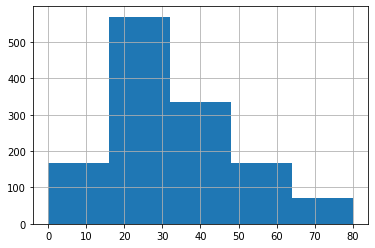

In [47]:
#from data distribution
dataset.Age.hist(bins = 5)
nan_list = np.random.randint(0, high = 80, size = len(dataset), dtype='l')
dataset['Age'][np.isnan(dataset['Age'])] = nan_list

In [45]:
# to train a linear regression
# with data like this -- only for continous mesurable data
array = train[['Pclass','SibSp','Parch','Fare','Age']]
from sklearn.linear_model import LinearRegression
X_train = array[array['Age'].notnull()].drop(columns = 'Age', inplace = False)
y_train = array[array['Age'].notnull()]['Age']
X_test = array[array['Age'].isnull()].drop(columns = 'Age', inplace = False)
y_test = array[array['Age'].isnull()]['Age']

model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
array.Age[array.Age.isnull()] = predicted
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
#using KNN -- for continous and categorical data -- with 5 default neighbours
from sklearn.neighbors import KNeighborsRegressor
columns = list(train)
model = KNeighborsRegressor()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
array.Age[train.Age.isnull()] = predicted
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Additional extras (Only theoretical without practice)

### Time-Series Specific Methods

-- **Last Observation Carried Forward (LOCF) & Next Observation Carried Backward (NOCB)**

   This is a common statistical approach to the analysis of longitudinal repeated measures data where some follow-up observations may be missing. Longitudinal data track the same sample at different points in time. Both these methods can introduce bias in analysis and perform poorly when data has a visible trend
   
-- **Linear Interpolation**

   This method works well for a time series with some trend but is not suitable for seasonal data
    
-- **Seasonal Adjustment + Linear Interpolation**

   This method works well for data with both trend and seasonality

In [12]:
# import impyute as na
# na.random(dataset)                  # Random Imputation
# na.locf(dataset, option = "locf")   # Last Obs. Carried Forward
# na.locf(dataset, option = "nocb")   # Next Obs. Carried Backward
# na.interpolation(dataset)           # Linear Interpolation
# na.seadec(dataset, algorithm = "interpolation") # Seasonal Adjustment then Linear Interpolation